# Pandas Series

![pandas](images/pandas.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/


```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

Matplotlib is building the font cache; this may take a moment.


## [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

<ipython-input-3-579d6b723cc5>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))


2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise
- Create a text with `lorem` and count word occurences with a `collection.Counter`. Put the result in a `dict`.

In [4]:
from lorem import text
from collections import Counter
import operator

c = Counter(filter(None,text().strip().replace('.','').replace('\n',' ').lower().split(' ')))
result = dict(sorted(c.most_common(),key=operator.itemgetter(1),reverse=True))
result

{'quiquia': 11,
 'amet': 11,
 'adipisci': 11,
 'modi': 11,
 'labore': 11,
 'sit': 10,
 'sed': 9,
 'magnam': 9,
 'velit': 9,
 'etincidunt': 8,
 'numquam': 8,
 'eius': 8,
 'ut': 8,
 'dolor': 8,
 'consectetur': 7,
 'tempora': 7,
 'dolorem': 7,
 'est': 6,
 'neque': 6,
 'dolore': 6,
 'ipsum': 6,
 'quaerat': 6,
 'aliquam': 5,
 'quisquam': 5,
 'porro': 4,
 'voluptatem': 3,
 'non': 2}

### Exercise
- From the results create a Pandas series name latin_series with words in alphabetical order as index.

In [5]:
df = pd.Series(result)
df

quiquia       11
amet          11
adipisci      11
modi          11
              ..
quisquam       5
porro          4
voluptatem     3
non            2
Length: 27, dtype: int64

### Exercise

- Plot the series using 'bar' kind.

<AxesSubplot:>

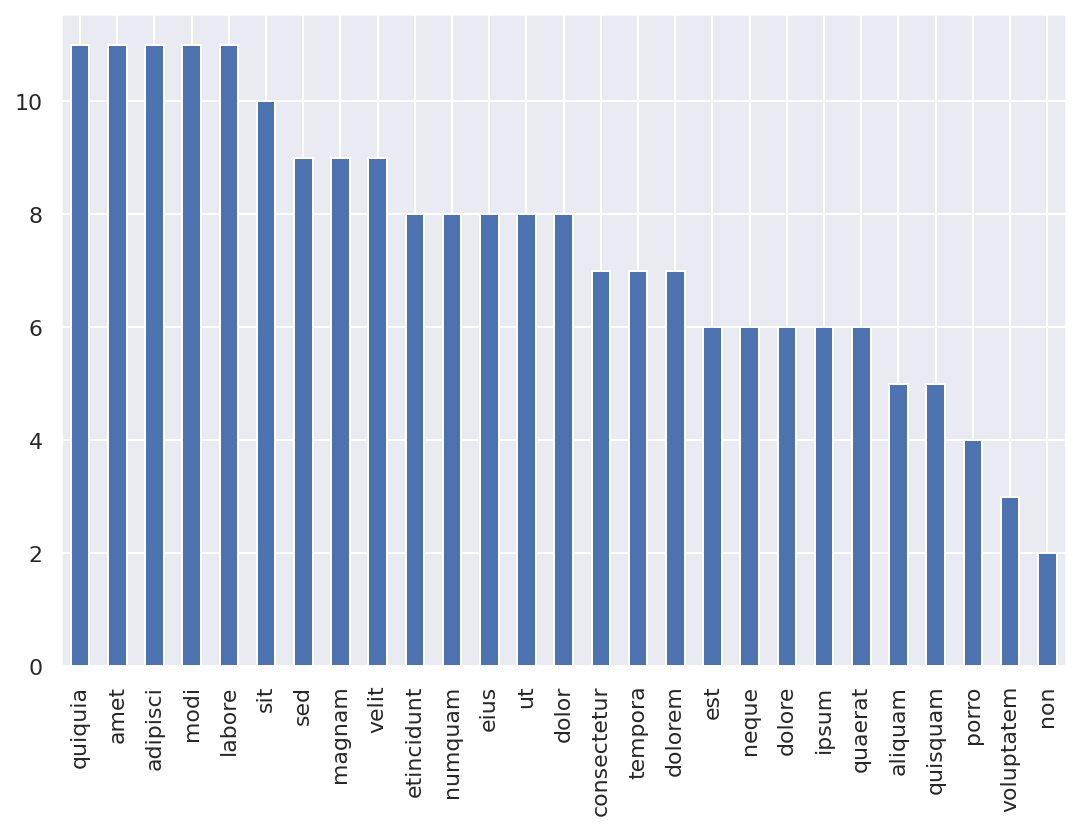

In [6]:
df.plot(kind='bar')

### Exercise
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.

In [7]:
df.loc['dolore']

6

In [8]:
df.iloc[-1]

2

### Exercise
- Sort words by number of occurrences.
- Plot the Series.

<AxesSubplot:>

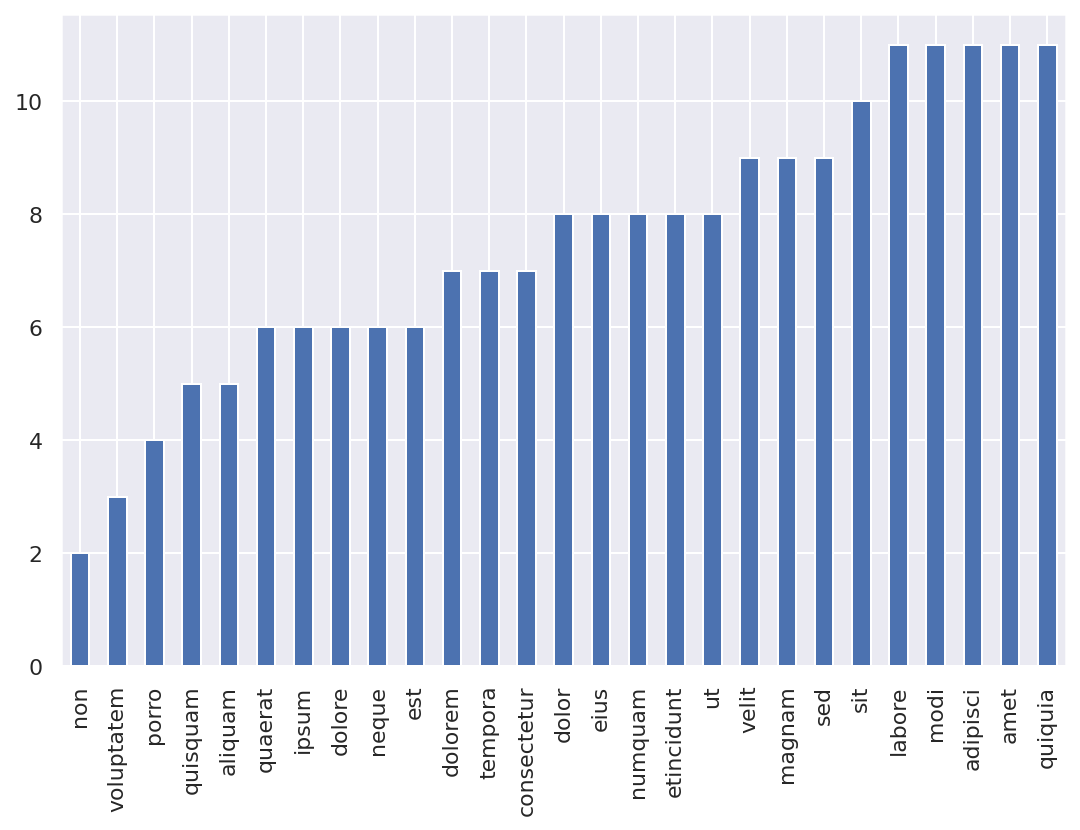

In [9]:
df = df.sort_values()
df.plot(kind='bar')

### Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe. 
In cells below you need to clean the data and convert the dataframe to a time series.

In [10]:
import os
here = os.getcwd()

filename = os.path.join(here,"data","monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+", 
                   names=["year", "month", "mean temp"])
df

,year,month,mean temp
0,1880,1,-0.0235
1,1880,2,-0.4936
2,1880,3,-0.6785
3,1880,4,-0.2829
...,...,...,...
1580,2011,9,-999.0000
1581,2011,10,-999.0000
1582,2011,11,-999.0000
1583,2011,12,-999.0000


### Exercise
- Insert a third column with value one named "day" with `.insert`.
- convert df index to datetime with `pd.to_datetime` function.
- convert df to Series containing only "mean temp" column.

In [11]:
df.insert(loc=2,column='day',value=np.ones(len(df)))
df

,year,month,day,mean temp
0,1880,1,1.0,-0.0235
1,1880,2,1.0,-0.4936
2,1880,3,1.0,-0.6785
3,1880,4,1.0,-0.2829
...,...,...,...,...
1580,2011,9,1.0,-999.0000
1581,2011,10,1.0,-999.0000
1582,2011,11,1.0,-999.0000
1583,2011,12,1.0,-999.0000


In [12]:
df.index = pd.to_datetime(df[['year','month','day']])
df

,year,month,day,mean temp
1880-01-01,1880,1,1.0,-0.0235
1880-02-01,1880,2,1.0,-0.4936
1880-03-01,1880,3,1.0,-0.6785
1880-04-01,1880,4,1.0,-0.2829
...,...,...,...,...
2011-09-01,2011,9,1.0,-999.0000
2011-10-01,2011,10,1.0,-999.0000
2011-11-01,2011,11,1.0,-999.0000
2011-12-01,2011,12,1.0,-999.0000


In [13]:
df = df['mean temp']
df

1880-01-01     -0.0235
1880-02-01     -0.4936
1880-03-01     -0.6785
1880-04-01     -0.2829
                ...   
2011-09-01   -999.0000
2011-10-01   -999.0000
2011-11-01   -999.0000
2011-12-01   -999.0000
Name: mean temp, Length: 1584, dtype: float64

In [14]:
type(df)

pandas.core.series.Series

### Exercise 
- Display the beginning of the file with `.head`.

In [15]:
df.head()

1880-01-01   -0.0235
1880-02-01   -0.4936
1880-03-01   -0.6785
1880-04-01   -0.2829
1880-05-01   -0.1261
Name: mean temp, dtype: float64

### Exercise 
- Display the end of the file with `.tail`.

In [16]:
df.tail()

2011-08-01   -999.0
2011-09-01   -999.0
2011-10-01   -999.0
2011-11-01   -999.0
2011-12-01   -999.0
Name: mean temp, dtype: float64

In the dataset, -999.00 was used to indicate that there was no value for that year.

### Exercise

- Display values equal to -999 with `.values`. 
- Replace the missing value (-999.000) by `np.nan` 


In [17]:
df[df.values == -999]

2011-07-01   -999.0
2011-08-01   -999.0
2011-09-01   -999.0
2011-10-01   -999.0
2011-11-01   -999.0
2011-12-01   -999.0
Name: mean temp, dtype: float64

In [18]:
df2 = df.copy()
df2[df == -999.0] = np.nan  # For this indexing we need a copy
df2.tail()

2011-08-01   NaN
2011-09-01   NaN
2011-10-01   NaN
2011-11-01   NaN
2011-12-01   NaN
Name: mean temp, dtype: float64

Once they have been converted to np.nan, missing values can be removed (dropped).

### Exercise 
- Remove missing values with `.dropna`.

In [19]:
df = df2.dropna()
df.tail()

2011-02-01    0.5113
2011-03-01    0.8618
2011-04-01    1.0897
2011-05-01    0.7247
2011-06-01    0.8550
Name: mean temp, dtype: float64

### Exercise
- Generate a basic visualization using `.plot`.

<AxesSubplot:>

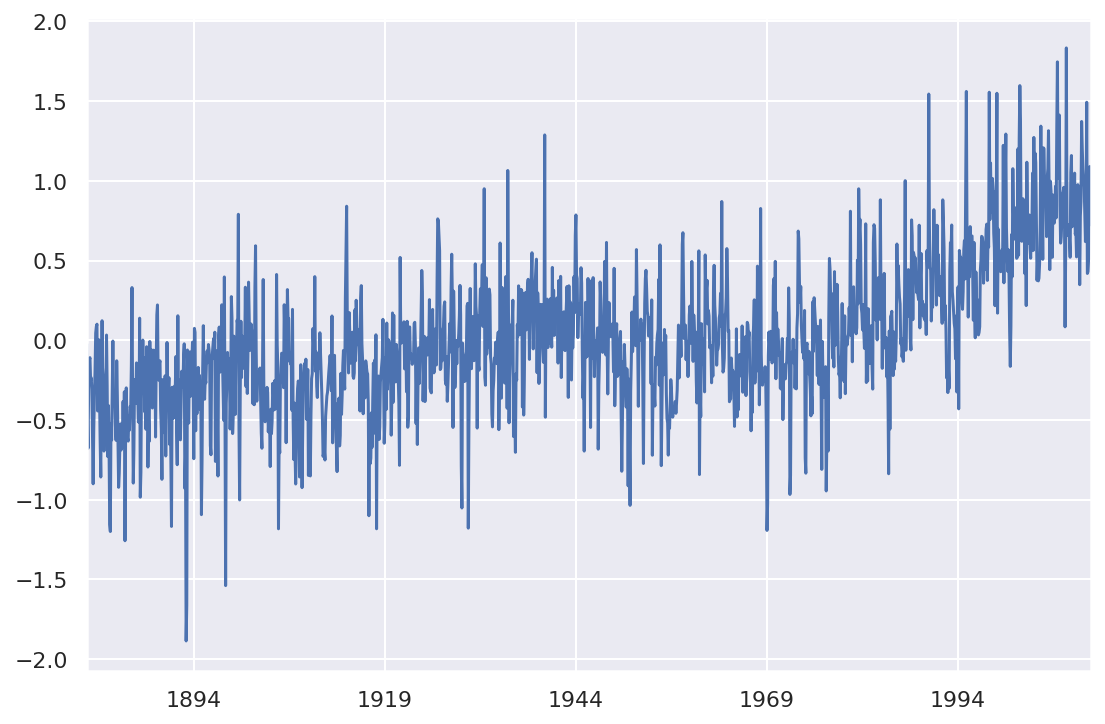

In [20]:
df.plot()

### Exercise

Convert df index from timestamp to period is more meaningfull since it was measured and averaged over the month. Use `to_period` method.


In [21]:
df = df.to_period('M')
df

1880-01   -0.0235
1880-02   -0.4936
1880-03   -0.6785
1880-04   -0.2829
            ...  
2011-03    0.8618
2011-04    1.0897
2011-05    0.7247
2011-06    0.8550
Freq: M, Name: mean temp, Length: 1578, dtype: float64

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Exercise

- With `resample` method, convert df Series to 10 year blocks:

In [22]:
df.resample('10A').mean()


1880   -0.386485
1890   -0.316798
1900   -0.256431
1910   -0.247673
          ...   
1980    0.188519
1990    0.463572
2000    0.785452
2010    0.884700
Freq: 10A-DEC, Name: mean temp, Length: 14, dtype: float64

### Saving Work

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [23]:
with pd.HDFStore("data/pandas_series.h5") as writer:
    df.to_hdf(writer, "/temperatures/full_globe")

### Reloading data

In [24]:
with pd.HDFStore("data/pandas_series.h5") as store:
    df = store["/temperatures/full_globe"]